In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from cleaning import data_cleaning
from analysis import fertilizer_correlation, pesticide_correlation, water_correlation, irrigation_correlation, soil_correlation

Load `agriculture_dataset.csv` as `df`.

# Exploratory Data Analysis

Create a copy of the dataset to use for cleaning.

Drop the `Season` column.

Check for duplicates and missing values.

In [23]:
clean_df, top_3_crops = data_cleaning("./data/agriculture_dataset.csv")

Missing Values: 
Farm_ID                      0
Crop_Type                    0
Farm_Area(acres)             0
Irrigation_Type              0
Fertilizer_Used(tons)        0
Pesticide_Used(kg)           0
Yield(tons)                  0
Soil_Type                    0
Season                       0
Water_Usage(cubic meters)    0
dtype: int64
Number of outliers detected: 0
Top 3 crops by yield: ['Tomato', 'Barley', 'Soybean']


In [24]:
clean_df.head()

,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters),z_score,fertilizer_to_yield_ratio,pesticide_to_yield_ratio,water_to_yield_ratio,fertilizer_to_acre_ratio,pesticide_to_acre_ratio,water_to_acre_ratio
0,F001,Cotton,329.40,Sprinkler,8.14,2.21,14.44,Loamy,Kharif,76648.20,0.955156,1.773956,6.533937,0.000188,0.024712,0.006709,232.690346
1,F002,Carrot,18.67,Manual,4.77,4.36,42.91,Peaty,Kharif,68725.54,1.199759,8.995807,9.841743,0.000624,0.255490,0.233530,3681.068024
2,F003,Sugarcane,306.03,Flood,2.91,0.56,33.44,Silty,Kharif,75538.56,0.482967,11.491409,59.714286,0.000443,0.009509,0.001830,246.833840
3,F004,Tomato,380.21,Rain-fed,3.32,4.35,34.08,Silty,Zaid,45401.23,0.531409,10.265060,7.834483,0.000751,0.008732,0.011441,119.410931
4,F005,Tomato,135.56,Sprinkler,8.33,4.48,43.28,Clay,Zaid,93718.69,1.227764,5.195678,9.660714,0.000462,0.061449,0.033048,691.344718


Visualize Crop Yield values to identify outliers.

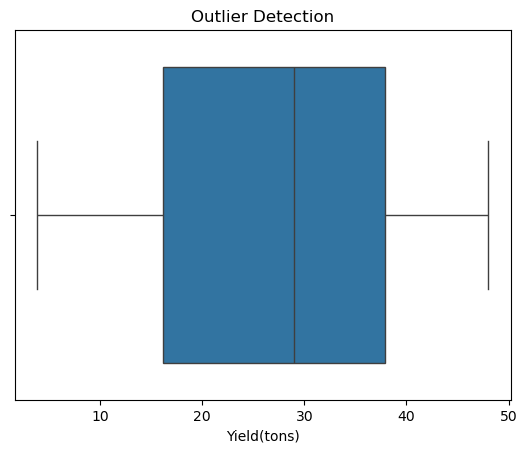

In [25]:
sns.boxplot(x=clean_df['Yield(tons)'])
plt.title('Outlier Detection')
plt.show()

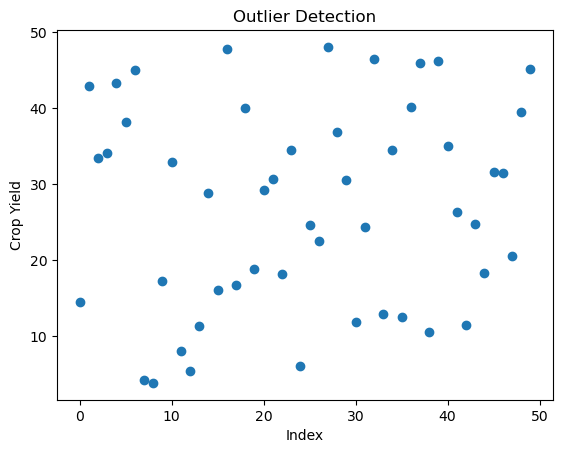

In [26]:
plt.scatter(range(len(clean_df['Yield(tons)'])), clean_df['Yield(tons)'])
plt.xlabel('Index')
plt.ylabel('Crop Yield')
plt.title('Outlier Detection')
plt.show()

In [27]:
clean_df['z_score'] = np.abs(stats.zscore(clean_df['Yield(tons)']))
outliers = clean_df[clean_df['z_score'] > 3]
outliers

,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters),z_score,fertilizer_to_yield_ratio,pesticide_to_yield_ratio,water_to_yield_ratio,fertilizer_to_acre_ratio,pesticide_to_acre_ratio,water_to_acre_ratio


In [28]:
outliers.shape[0]

0

Based on a z-score of 3 there does not seem to be any significant outlier values for crop yield that should be removed.

## Top 3 Crops

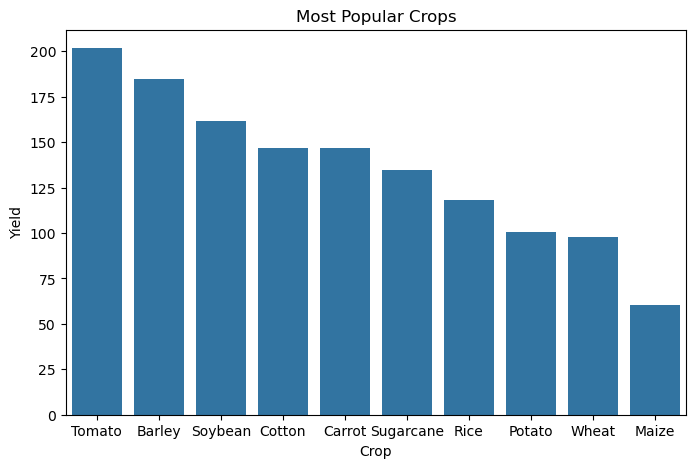

In [29]:
popular_by_yield = clean_df.groupby('Crop_Type')['Yield(tons)'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=popular_by_yield.index, y=popular_by_yield.values)
plt.xlabel("Crop")
plt.ylabel("Yield")
plt.title("Most Popular Crops")
plt.show()

In [30]:
top_3_crops = popular_by_yield.head(3).index.tolist()
print(f"Top 3 crops by yield: {top_3_crops}")

Top 3 crops by yield: ['Tomato', 'Barley', 'Soybean']


The 3 crops with the highest yield are **Tomatoes**, **Barley**, and **Soybeans**. We will use these three crops to analyze the relationship between crop yield and input factors.

In [31]:
df_tomatoes = clean_df[clean_df['Crop_Type'] == 'Tomato']
df_barley = clean_df[clean_df['Crop_Type'] == 'Barley']
df_soybeans = clean_df[clean_df['Crop_Type'] == 'Soybean']

## Fertilizer Usage

In [36]:
fert_stat_sig = []
fert_not_stat_sig = []
fert_stat_sig1, fert_not_stat_sig1, tomato_corr, tomato_pval = fertilizer_correlation(clean_df, f"{top_3_crops[0]}")
fert_stat_sig.append(fert_stat_sig1)
fert_not_stat_sig.append(fert_not_stat_sig1)

fert_stat_sig2, fert_not_stat_sig2, barley_corr, barley_pval = fertilizer_correlation(clean_df, f"{top_3_crops[1]}")
fert_stat_sig.append(fert_stat_sig2)
fert_not_stat_sig.append(fert_not_stat_sig2)

fert_stat_sig3, fert_not_stat_sig3, soybean_corr, soybean_corr = fertilizer_correlation(clean_df, f"{top_3_crops[2]}")
fert_stat_sig.append(fert_stat_sig3)
fert_not_stat_sig.append(fert_not_stat_sig3)

Correlation between fertilizer usage and Tomato yield: 0.7
P-Value: 0.16221104696807784
There is a moderate, positive correlation between fertilizer usage and Tomato yield.

Correlation between fertilizer usage and Barley yield: 0.6
P-Value: 0.1354422206226327
There is a moderate, positive correlation between fertilizer usage and Barley yield.

Correlation between fertilizer usage and Soybean yield: 0.7
P-Value: 0.18382385357566636
There is a strong, positive correlation between fertilizer usage and Soybean yield.



Create a new column to calculate the Fertilizer Usage to Crop Yield ratio.

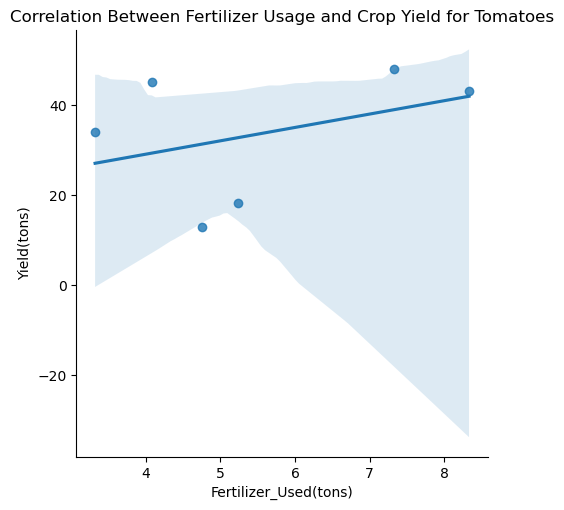

Correlation between Fertilizer Usage and Tomato Yield: 0.65, p-value: 0.16


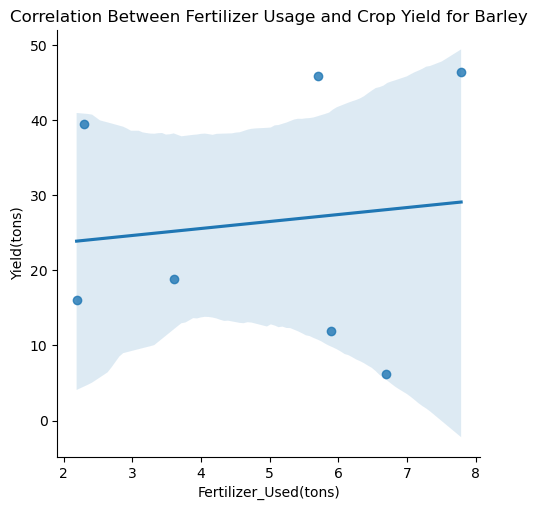

Correlation between Fertilizer Usage and Barley Yield: 0.62, p-value: 0.14


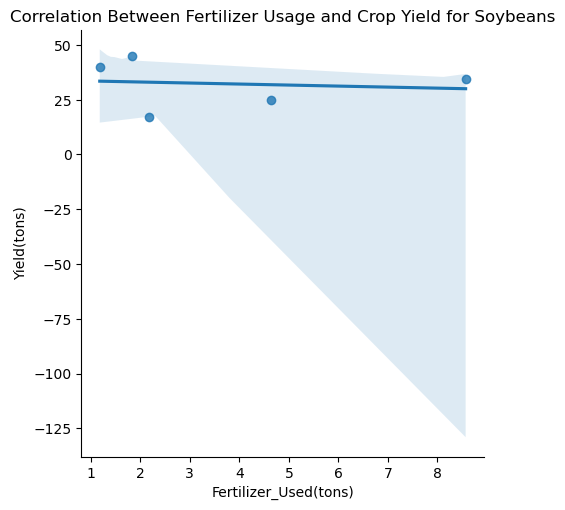

Correlation between Fertilizer Usage and Soybean Yield: 0.18, p-value: 0.14


In [37]:
# Plot for Tomatoes
sns.lmplot(x='Fertilizer_Used(tons)', y='Yield(tons)', data=df_tomatoes)
plt.title("Correlation Between Fertilizer Usage and Crop Yield for Tomatoes")
plt.show()
print(f"Correlation between Fertilizer Usage and Tomato Yield: {tomato_corr:.2f}, p-value: {tomato_pval:.2f}")

# Plot for Barley
sns.lmplot(x='Fertilizer_Used(tons)', y='Yield(tons)', data=df_barley)
plt.title("Correlation Between Fertilizer Usage and Crop Yield for Barley")
plt.show()
print(f"Correlation between Fertilizer Usage and Barley Yield: {barley_corr:.2f}, p-value: {barley_pval:.2f}")

# Plot for Soybean
sns.lmplot(x='Fertilizer_Used(tons)', y='Yield(tons)', data=df_soybeans)
plt.title("Correlation Between Fertilizer Usage and Crop Yield for Soybeans")
plt.show()
print(f"Correlation between Fertilizer Usage and Soybean Yield: {soybean_corr:.2f}, p-value: {barley_pval:.2f}")

### Fertilizer Correlation Findings
The correlation between Fertilizer Usage and Tomato, Barley, and Soybean Yield seems to be statistically significant, as they all have a P-value higher that 0.05.

## Pesticide Usage

Create a new column to calculate the Pesticide Usage to Crop Yield ratio.

In [38]:
pest_stat_sig = []
pest_not_stat_sig = []
pest_stat_sig1, pest_not_stat_sig1, tomato_corr, tomato_pval = pesticide_correlation(clean_df, f"{top_3_crops[0]}")
pest_stat_sig.append(pest_stat_sig1)
pest_not_stat_sig.append(pest_not_stat_sig1)

pest_stat_sig2, pest_not_stat_sig2, barley_corr, barley_pval = pesticide_correlation(clean_df, f"{top_3_crops[1]}")
pest_stat_sig.append(pest_stat_sig2)
pest_not_stat_sig.append(pest_not_stat_sig2)

pest_stat_sig3, pest_not_stat_sig3, soybean_corr, soybean_pval = pesticide_correlation(clean_df, f"{top_3_crops[2]}")
pest_stat_sig.append(pest_stat_sig3)
pest_not_stat_sig.append(pest_not_stat_sig3)

Correlation between pesticide usage and Tomato yield: 0.3
P-Value: 0.51
There is a weak, positive correlation between pesticide usage and Tomato yield.

Correlation between pesticide usage and Barley yield: 0.4
P-Value: 0.35
There is a moderate, positive correlation between pesticide usage and Barley yield.

Correlation between pesticide usage and Soybean yield: 0.5
P-Value: 0.35
There is a moderate, positive correlation between pesticide usage and Soybean yield.



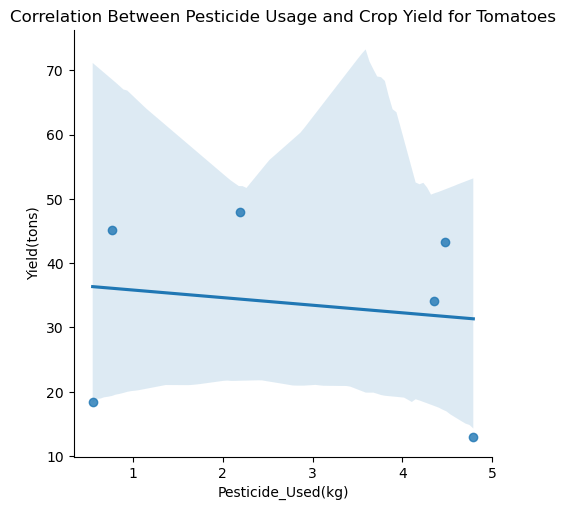

Correlation between Pesticide Usage and Tomato Yield: 0.34, p-value: 0.51


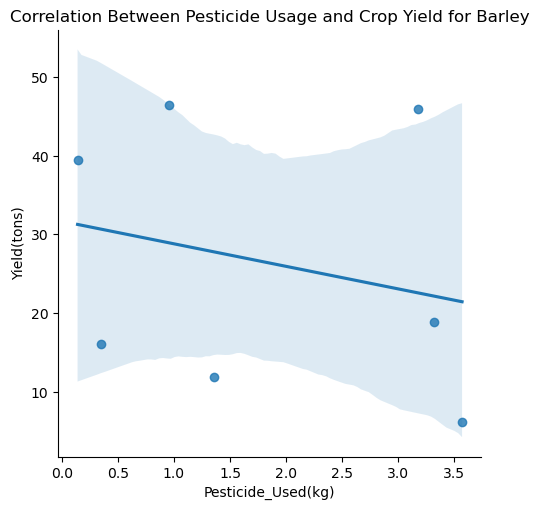

Correlation between Pesticide Usage and Barley Yield: 0.42, p-value: 0.35


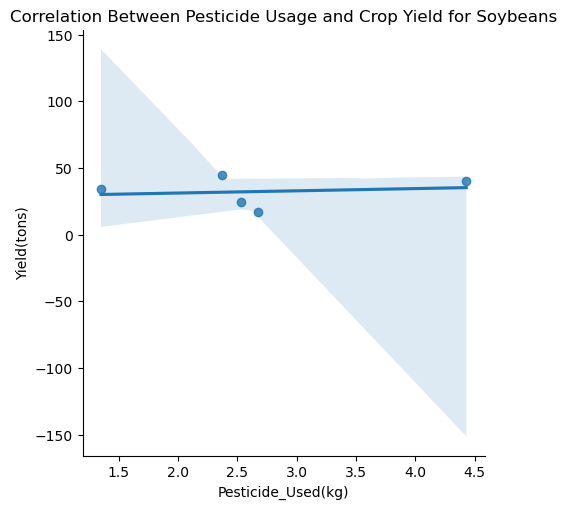

Correlation between Pesticide Usage and Soybean Yield: 0.54, p-value: 0.35


In [39]:
# Plot for Tomatoes
sns.lmplot(x='Pesticide_Used(kg)', y='Yield(tons)', data=df_tomatoes)
plt.title("Correlation Between Pesticide Usage and Crop Yield for Tomatoes")
plt.show()
print(f"Correlation between Pesticide Usage and Tomato Yield: {tomato_corr:.2f}, p-value: {tomato_pval:.2f}")

# Plot for Barley
sns.lmplot(x='Pesticide_Used(kg)', y='Yield(tons)', data=df_barley)
plt.title("Correlation Between Pesticide Usage and Crop Yield for Barley")
plt.show()
print(f"Correlation between Pesticide Usage and Barley Yield: {barley_corr:.2f}, p-value: {barley_pval:.2f}")

# Plot for Soybean
sns.lmplot(x='Pesticide_Used(kg)', y='Yield(tons)', data=df_soybeans)
plt.title("Correlation Between Pesticide Usage and Crop Yield for Soybeans")
plt.show()
print(f"Correlation between Pesticide Usage and Soybean Yield: {soybean_corr:.2f}, p-value: {barley_pval:.2f}")

### Pesticide Correlation Findings
The correlation and P-value found for Tomatoes, Barley, and Soybeans suggest that there is a statistically significant correlation between pesticide usage and crop yield as they are all higher than 0.05.

## Water Usage Correlation

In [41]:
water_stat_sig = []
water_not_stat_sig = []

water_stat_sig1, water_not_stat_sig1, tomato_corr, tomato_pval = water_correlation(clean_df, f"{top_3_crops[0]}")
water_stat_sig.append(water_stat_sig1)
water_not_stat_sig.append(water_not_stat_sig1)

water_stat_sig2, water_not_stat_sig2, barley_corr, barley_pval = water_correlation(clean_df, f"{top_3_crops[1]}")
water_stat_sig.append(water_stat_sig2)
water_not_stat_sig.append(water_not_stat_sig2)

water_stat_sig3, water_not_stat_sig3, soybean_corr, soybean_pval = water_correlation(clean_df, f"{top_3_crops[2]}")
water_stat_sig.append(water_stat_sig3)
water_not_stat_sig.append(water_not_stat_sig3)

Correlation between water usage and Tomato yield: 0.6
P-Value: 0.22
There is a moderate, positive correlation between water usage and Tomato yield.

Correlation between water usage and Barley yield: 0.7
P-Value: 0.07
There is a strong, positive correlation between water usage and Barley yield.

Correlation between water usage and Soybean yield: 0.8
P-Value: 0.09
There is a strong, positive correlation between water usage and Soybean yield.



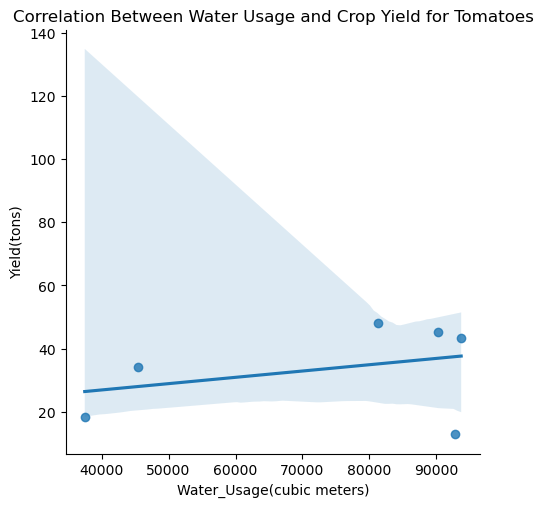

Correlation between Water Usage and Tomato Yield: 0.58, p-value: 0.22


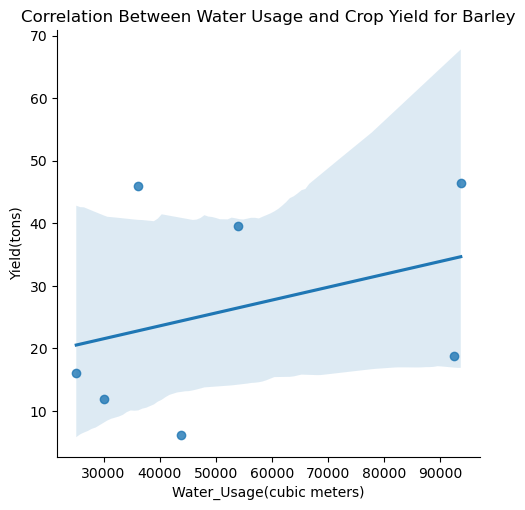

Correlation between Water Usage and Barley Yield: 0.71, p-value: 0.07


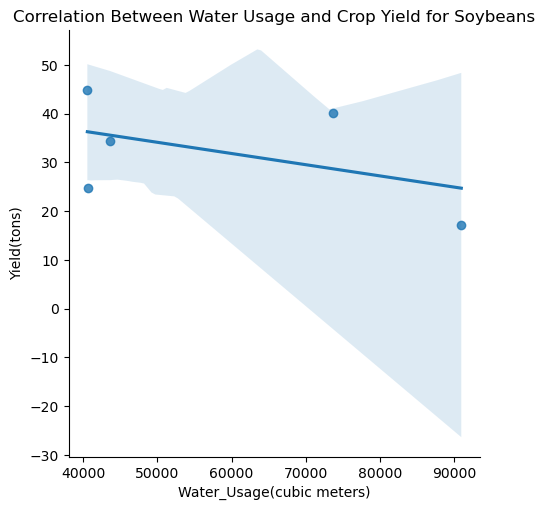

Correlation between Water Usage and Soybean Yield: 0.82, p-value: 0.07


In [43]:
# Plot for Tomatoes
sns.lmplot(x='Water_Usage(cubic meters)', y='Yield(tons)', data=df_tomatoes)
plt.title("Correlation Between Water Usage and Crop Yield for Tomatoes")
plt.show()
print(f"Correlation between Water Usage and Tomato Yield: {tomato_corr:.2f}, p-value: {tomato_pval:.2f}")

# Plot for Barley
sns.lmplot(x='Water_Usage(cubic meters)', y='Yield(tons)', data=df_barley)
plt.title("Correlation Between Water Usage and Crop Yield for Barley")
plt.show()
print(f"Correlation between Water Usage and Barley Yield: {barley_corr:.2f}, p-value: {barley_pval:.2f}")

# Plot for Soybean
sns.lmplot(x='Water_Usage(cubic meters)', y='Yield(tons)', data=df_soybeans)
plt.title("Correlation Between Water Usage and Crop Yield for Soybeans")
plt.show()
print(f"Correlation between Water Usage and Soybean Yield: {soybean_corr:.2f}, p-value: {barley_pval:.2f}")

### Water Correlation Findings
The correlation and P-value found for Tomatoes, Barley, and Soybeans suggest that there is a statistically significant correlation between water usage and crop yield as they are all higher than 0.05.